In [1]:
import cv2
import matplotlib.pyplot as plt
from rembg import remove
import easygui as eg

In [2]:
path = 'img/img2.png'
img = cv2.imread(path)


In [3]:
def show_img(img):
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    

In [4]:
# show_img(out_put)

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

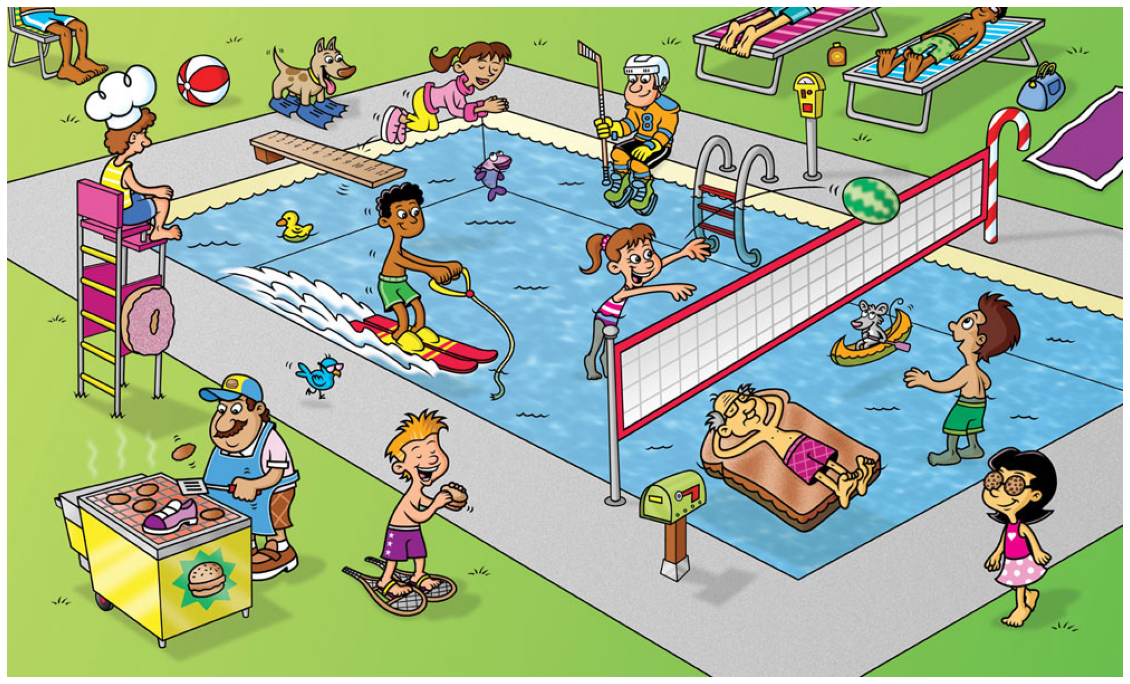

In [6]:
show_img(img_rgb)

## Recognition

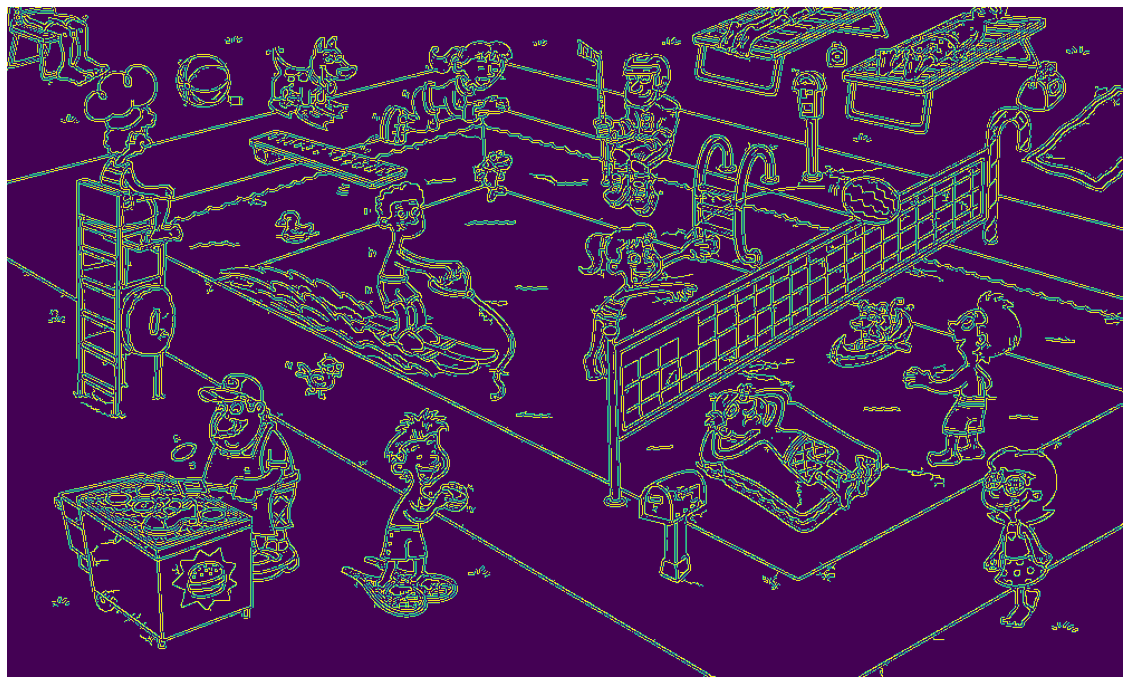

In [7]:
edge = cv2.Canny(img, 10, 250)
show_img(edge)

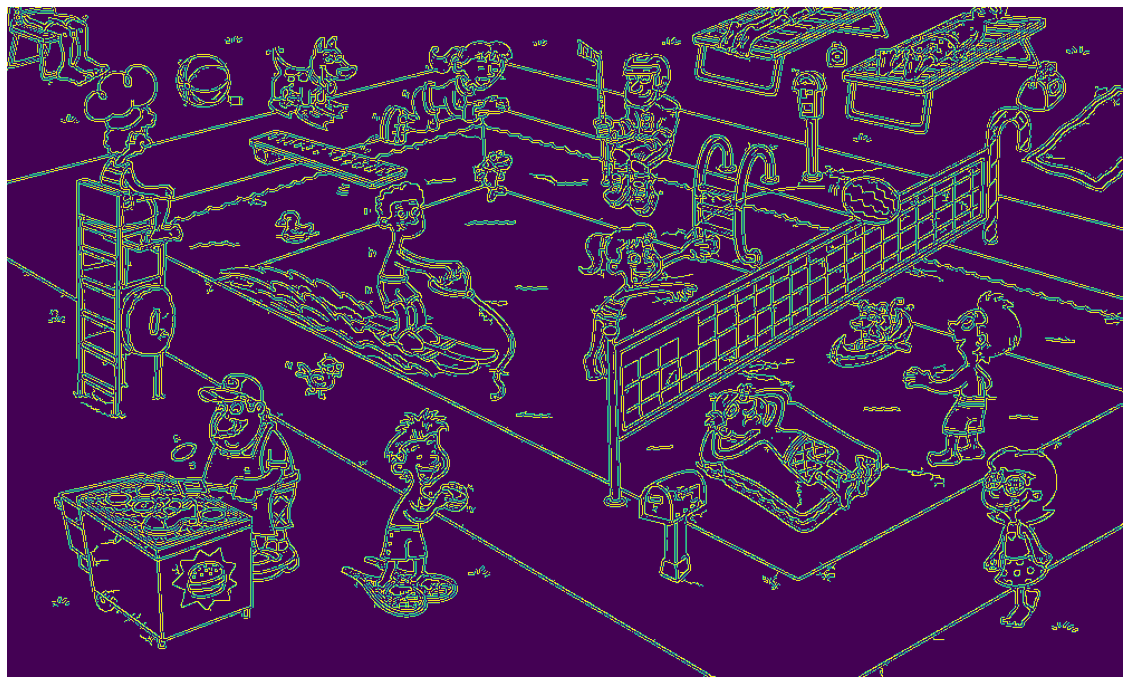

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
show_img(closed)

## find contour

In [9]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

idx = 0
object_ls = []
for c in cnts:
    # peri = cv2.arcLength(c, True)
    # approx = cv2.approxPolyDP(c, 0.02*peri, True)
    # cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
    
    x, y, w, h = cv2.boundingRect(c)
    
    if w>15 & w<img.shape[1] -1 and h>15 & h<img.shape[0]-1:
        
        new_img = img[y:y+h, x:x+w]
        object_ls.append(['output/'+str(idx)+'.png', x, y, w, h])
        # new_img = remove(new_img)
        cv2.imwrite('output/'+str(idx)+'.png', new_img)
        idx += 1
# plt.figure(figsize=(10, 10))
# plt.imshow(img)



In [10]:
print(object_ls)

[['output/0.png', 844, 537, 32, 19], ['output/1.png', 892, 519, 25, 35], ['output/2.png', 763, 506, 141, 94], ['output/3.png', 299, 501, 89, 45], ['output/4.png', 361, 496, 17, 21], ['output/5.png', 332, 496, 16, 24], ['output/6.png', 220, 494, 40, 19], ['output/7.png', 365, 493, 39, 40], ['output/8.png', 140, 484, 79, 84], ['output/9.png', 148, 484, 58, 57], ['output/10.png', 74, 482, 17, 19], ['output/11.png', 344, 476, 18, 19], ['output/12.png', 122, 455, 96, 34], ['output/13.png', 153, 424, 24, 18], ['output/14.png', 642, 414, 102, 50], ['output/15.png', 42, 410, 221, 165], ['output/16.png', 755, 409, 23, 36], ['output/17.png', 147, 390, 23, 17], ['output/18.png', 272, 388, 31, 19], ['output/19.png', 377, 361, 19, 19], ['output/20.png', 558, 360, 39, 24], ['output/21.png', 534, 355, 466, 167], ['output/22.png', 617, 341, 223, 130], ['output/23.png', 625, 337, 46, 40], ['output/24.png', 802, 334, 84, 78], ['output/25.png', 608, 334, 32, 20], ['output/26.png', 620, 317, 16, 18], ['ou

## change color

In [11]:
import numpy as np

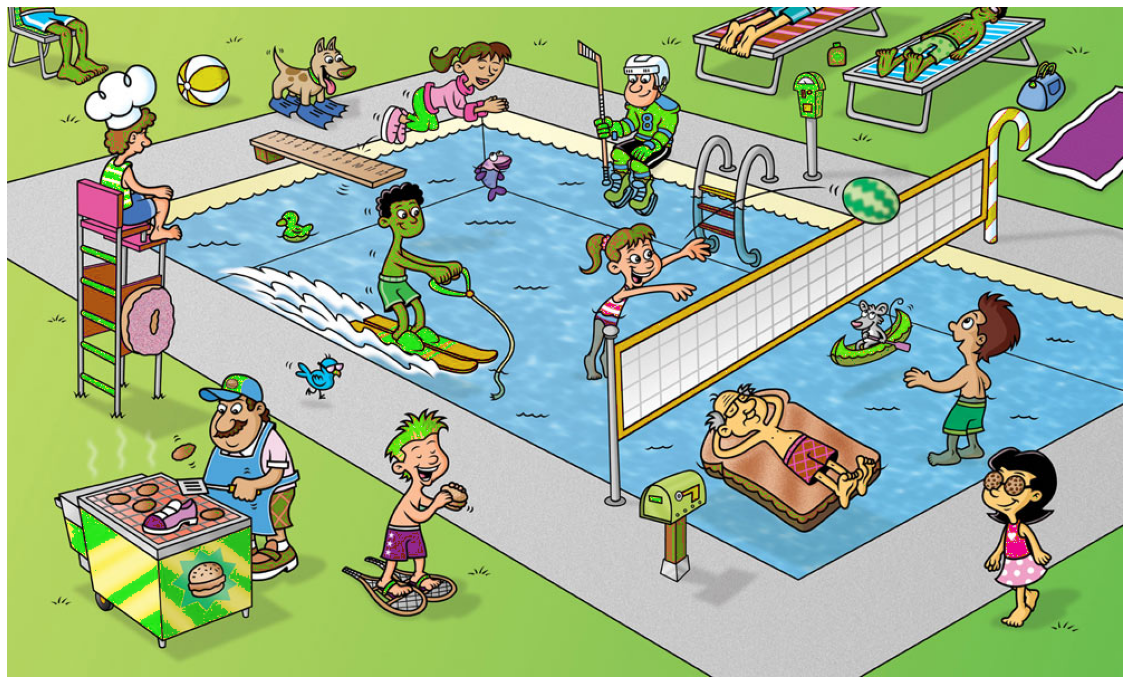

In [12]:

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

lower = np.array([80, 190, 120])
upper = np.array([150, 250, 255])

mask = cv2.inRange(img_hsv, lower, upper)
inv_mask = cv2.bitwise_not(mask)

h, s, v = cv2.split(img_hsv)

h = np.mod(h + 100, 130)
s = np.clip(s +10 , 20, 255)
v = np.clip(v -20 , 20, 255)

img_hsv = cv2.merge([h, s, v])

bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

result = cv2.bitwise_or(cv2.bitwise_and(img_rgb, img_rgb, mask = inv_mask), cv2.bitwise_and(bgr, bgr, mask = mask))

show_img(result)


In [27]:
def change_object_color(index, obj_img =object_ls ):
    dir = obj_img[index][0]
    
    img = cv2.imread(dir)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    lower = np.array([50, 190, 120])
    upper = np.array([170, 250, 255])

    mask = cv2.inRange(img_hsv, lower, upper)
    inv_mask = cv2.bitwise_not(mask)

    h, s, v = cv2.split(img_hsv)

    h = np.mod(h + 120, 150)
    s = np.clip(s +30 , 10, 255)
    v = np.clip(v -20 , 10, 255)
    img_hsv = cv2.merge([h, s, v])

    bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

    result = cv2.bitwise_or(cv2.bitwise_and(img_rgb, img_rgb, mask = inv_mask), cv2.bitwise_and(bgr, bgr, mask = mask))
    result = remove(result, True)
    result = remove(result)
    # result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(index)+'_.png',result)
    


In [14]:
ori_img = cv2.imread(path, cv2.IMREAD_UNCHANGED)

In [15]:
def paste_to_img(index, ori_img = ori_img, obj_img = object_ls):
    change_object_color(index)
    
    x = obj_img[index][1]
    y = obj_img[index][2]
    w = obj_img[index][3]
    h = obj_img[index][4]
    
    height, width = ori_img.shape[:2]
    img_ = cv2.imread(str(index)+ '_.png', cv2.IMREAD_UNCHANGED)
    
    bg_bgr = ori_img[:,:,0:3]
    bg_mask = ori_img[:,:,3]
    bgr = img_[:,:,0:3]
    mask = img_[:, :, 3]
    
    bgr_new = bg_bgr.copy()
    bgr_new[y:y+h, x:x+w] = bgr
    
    mask_new = np.zeros((height, width), dtype = np.uint8)
    mask_new[y:y+h, x:x+w] = mask
    
    mask_combined = cv2.multiply(bg_mask, mask_new)
    mask_combined = cv2.cvtColor(mask_combined, cv2.COLOR_GRAY2BGR)
    
    result = np.where(mask_combined==255, bgr_new, bg_bgr)
    cv2.imwrite('result.png', result)

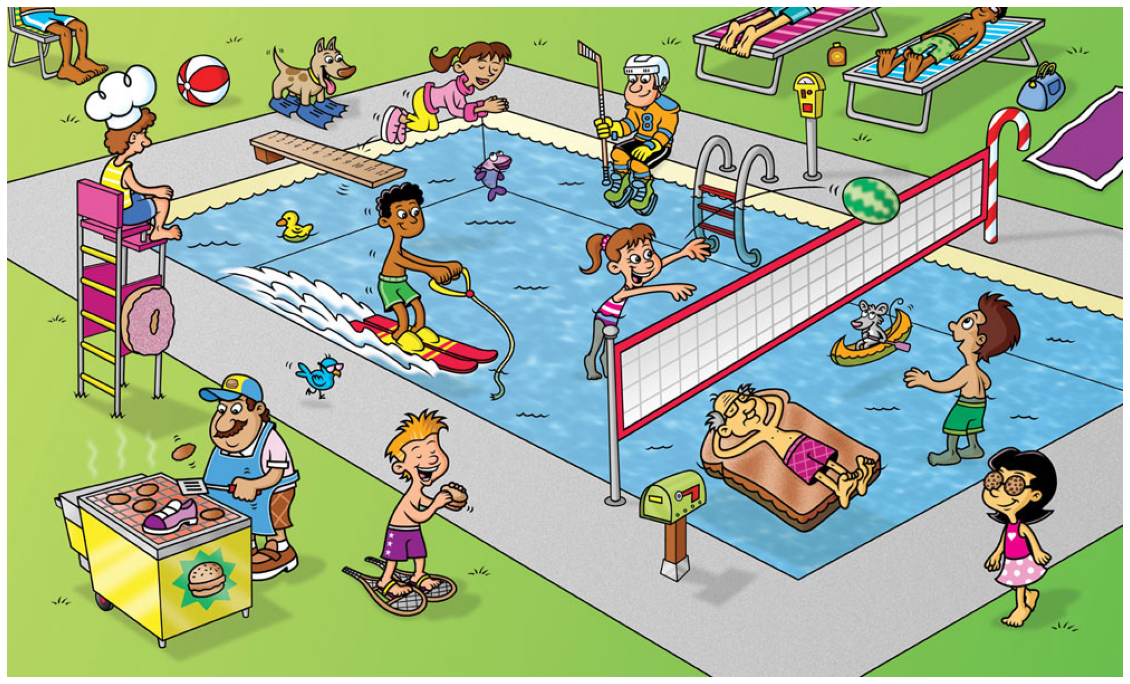

In [30]:
paste_to_img(13)
show_img(img_rgb)

In [17]:
cv2.imwrite('result.png', cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

True